In [1]:
import pandas as pd
import numpy as np
import pdb
from collections import defaultdict

In [2]:
data_raw = pd.read_csv('./data_preprocessed.csv')
data_raw['market_cap'] = data_raw['circulating_supply']*data_raw['price']

data_preprocessed = data_raw.copy()

In [3]:
data_raw

,date,rank,name,symbol,size,price,circulating_supply,volume-24-h,market_cap
0,2013-04-28,1,Bitcoin,BTC,1.663073e+12,149943.59,11091325,NaN,1.663073e+12
1,2013-04-28,2,Litecoin,LTC,8.338679e+10,4858.17,17164230,NaN,8.338675e+10
2,2013-04-28,3,Peercoin,PPC,8.100133e+09,431.84,18757362,NaN,8.100179e+09
3,2013-04-28,4,Namecoin,NMC,6.698914e+09,1237.03,5415300,NaN,6.698889e+09
4,2013-04-28,5,Terracoin,TRC,1.679309e+09,722.73,2323570,NaN,1.679314e+09
...,...,...,...,...,...,...,...,...,...
77442,2021-05-30,196,Metadium,META,1.556353e+11,124.97,1245430304,5.874952e+08,1.556414e+11
77443,2021-05-30,197,Travala.com,AVA,1.517516e+11,3051.79,49725503,4.662979e+09,1.517518e+11
77444,2021-05-30,198,Syscoin,SYS,1.529357e+11,249.55,612843612,1.235756e+09,1.529351e+11
77445,2021-05-30,199,aelf,ELF,1.523926e+11,279.89,544480200,1.830676e+10,1.523946e+11


In [4]:
date_list = list(data_raw['date'].unique())

In [5]:
def factor_make(t_n,factor_name='price'):

    price_return_list = []

    for date_index in range(len(date_list)):
        if ( ((date_index>= -t_n) & (t_n<0)) | ((date_index<len(date_list)-t_n) &(t_n>0))) :
            compare_day = data_raw[data_raw['date']==date_list[date_index+t_n]] 
            now_day = data_raw[data_raw['date']==date_list[date_index]]

            compare_day.columns =compare_day.columns +'_compare'
            now_day.columns =now_day.columns+'_now_day'

            compare_day = compare_day.drop_duplicates(subset=['symbol_compare'])
            all_frame_m = pd.merge(now_day, compare_day, left_on='symbol_now_day', right_on='symbol_compare', how='left')
            
            if t_n<0:
                price_return_temp = all_frame_m[f'{factor_name}_now_day']/all_frame_m[f'{factor_name}_compare']-1
            else:
                price_return_temp = all_frame_m[f'{factor_name}_compare']/all_frame_m[f'{factor_name}_now_day']-1
                
            price_return_list =price_return_list +list(price_return_temp)

        else:
            now_day = data_raw[data_raw['date']==date_list[date_index]]
            price_return_list = price_return_list + [np.nan]*len(now_day)
    
 
    return price_return_list

In [6]:
def rank_weighted_factor_return(data_temp,factor='market_cap'):
    data_temp = data_temp.sort_values(by=[f'{factor}'])
    data_temp = data_temp.reset_index()
    weight_array=np.array(data_temp.index)-np.mean(np.array(data_temp.index))
    weight_array = weight_array/(np.sum(abs(weight_array))/2)
    
    factor_return_series = np.array(data_temp['t_1_lead1_return'])*weight_array
    factor_return_series = factor_return_series[~np.isnan(factor_return_series)]
    
    if len(factor_return_series)!=0:
        return np.sum(factor_return_series)
    else:
        return 0 

In [7]:
data_preprocessed['t_3_return'] = pd.Series(factor_make(t_n=-3,factor_name='price'))
data_preprocessed['t_12_return'] = pd.Series(factor_make(t_n=-12,factor_name='price'))
data_preprocessed['t_12_market_cap'] = pd.Series(factor_make(t_n=-12,factor_name='market_cap'))
data_preprocessed['t_1_lead'] = pd.Series(factor_make(t_n=1,factor_name='price'))

In [84]:
data_preprocessed

,date,rank,name,symbol,size,price,circulating_supply,volume-24-h,market_cap,t_3_return,t_12_return,t_12_market_cap,t_1_lead
0,2013-04-28,1,Bitcoin,BTC,1.663073e+12,149943.59,11091325,NaN,1.663073e+12,NaN,NaN,NaN,-0.136354
1,2013-04-28,2,Litecoin,LTC,8.338679e+10,4858.17,17164230,NaN,8.338675e+10,NaN,NaN,NaN,-0.174203
2,2013-04-28,3,Peercoin,PPC,8.100133e+09,431.84,18757362,NaN,8.100179e+09,NaN,NaN,NaN,-0.214315
3,2013-04-28,4,Namecoin,NMC,6.698914e+09,1237.03,5415300,NaN,6.698889e+09,NaN,NaN,NaN,0.039522
4,2013-04-28,5,Terracoin,TRC,1.679309e+09,722.73,2323570,NaN,1.679314e+09,NaN,NaN,NaN,-0.122023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77442,2021-05-30,196,Metadium,META,1.556353e+11,124.97,1245430304,5.874952e+08,1.556414e+11,NaN,NaN,NaN,NaN
77443,2021-05-30,197,Travala.com,AVA,1.517516e+11,3051.79,49725503,4.662979e+09,1.517518e+11,-0.463302,0.037329,0.011078,NaN
77444,2021-05-30,198,Syscoin,SYS,1.529357e+11,249.55,612843612,1.235756e+09,1.529351e+11,-0.597474,0.131489,0.140441,NaN
77445,2021-05-30,199,aelf,ELF,1.523926e+11,279.89,544480200,1.830676e+10,1.523946e+11,-0.444078,-0.151514,-0.151514,NaN


<AxesSubplot:>

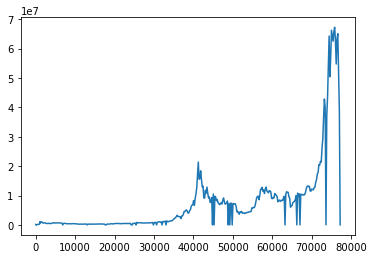

In [83]:
data_preprocessed[data_preprocessed.symbol == "BTC"].price.plot()

In [8]:
#  Data Dict = value > p1 > ew > {2021-05-12 : 0.0002}

In [9]:
def make_factor_raw_data(data, factor_col_name, cut_num):
    nested_dict = lambda: defaultdict(nested_dict)
    raw_dict = nested_dict()
    
    data = data.iloc[data_preprocessed[factor_col_name].dropna().index]
    date_list = list(data['date'].unique())
    
    for d in date_list:
        sorted_data = data[data.date == d].sort_values(factor_col_name, ascending=False)
        factor_col = pd.qcut(sorted_data[factor_col_name], cut_num)
        group_data = sorted_data.groupby(factor_col)

        for i ,f in  enumerate(factor_col.values.unique()):
            
            raw_dict[d]['p'+str(i+1)] = group_data.get_group(f)
            
    return raw_dict

In [10]:
mom_dict = make_factor_raw_data(data_preprocessed, 't_3_return', 5)

In [15]:
mom_dict['2013-08-11']['p1']

,date,rank,name,symbol,size,price,circulating_supply,volume-24-h,market_cap,t_3_return,t_12_return,t_12_market_cap,t_1_lead
407,2013-08-11,21,GoldCoin,GLC,5.884359e+07,2.290000,25661660,NaN,5.876520e+07,1.822282,NaN,NaN,5.170306
404,2013-08-11,18,Infinitecoin,IFC,8.942289e+07,0.001267,70605864960,NaN,8.945763e+07,1.800000,NaN,NaN,3.654301
431,2013-08-11,45,Doubloons,DBL,3.072945e+06,5.690000,540490,NaN,3.075388e+06,0.975694,NaN,NaN,0.093146
392,2013-08-11,6,Feathercoin,FTC,2.237362e+09,170.170000,13147650,NaN,2.237336e+09,0.884914,0.200579,1.401732,-0.030852
402,2013-08-11,16,Mincoin,MNC,9.787766e+07,78.300000,1250067,NaN,9.788025e+07,0.801242,-0.640941,-0.576970,0.053129
403,2013-08-11,17,Ixcoin,IXC,9.503124e+07,6.470000,14698514,NaN,9.509939e+07,0.483945,-0.525660,-0.449004,0.089645
390,2013-08-11,4,Namecoin,NMC,4.719522e+09,752.280000,6273643,NaN,4.719536e+09,0.378509,-0.214846,-0.117932,0.011804
393,2013-08-11,7,Novacoin,NVC,2.011780e+09,5751.810000,349764,NaN,2.011776e+09,0.336108,0.422874,0.765363,0.023387


In [24]:
def make_factor_return(raw_dict):
    ew_ret_df = pd.DataFrame()
    vw_ret_df = pd.DataFrame()
    
    for d, port in raw_dict.items():
        for p, data in port.items():
            raw_data = mom_dict[d][p]
            equal_w_ret = raw_data.t_1_lead.mean()
            value_w_ret = (raw_data.t_1_lead * raw_data.market_cap).sum() / raw_data.market_cap.sum()
            ew_ret_df.loc[d, p] = equal_w_ret
            vw_ret_df.loc[d, p] = value_w_ret
            
    return ew_ret_df, vw_ret_df

In [25]:
ew_ret_df, vw_ret_df = make_factor_return(mom_dict)

In [61]:
ew_ret_df

,p1,p2,p3,p4,p5
2013-05-19,0.142515,0.084842,-0.016522,0.001334,-0.107572
2013-05-26,-0.088673,-0.278885,-0.254638,-0.218133,-0.282228
2013-06-02,-0.174606,0.067303,-0.202064,-0.134912,-0.122149
2013-06-09,-0.053863,-0.141868,-0.207224,-0.179498,-0.202520
2013-06-16,-0.999084,-0.998954,-0.999409,-0.999022,-0.999176
...,...,...,...,...,...
2021-05-02,0.195985,0.080645,0.067955,0.039573,0.079616
2021-05-09,-0.109959,-0.147464,-0.136398,-0.054387,-0.146529
2021-05-16,-0.504679,-0.482080,-0.444337,-0.330081,-0.423161
2021-05-23,-0.174767,0.030106,0.040806,0.088239,0.291741


In [72]:
ew_ret_df.p1

2013-05-19    0.142515
2013-05-26   -0.088673
2013-06-02   -0.174606
2013-06-09   -0.053863
2013-06-16   -0.999084
                ...   
2021-05-02    0.195985
2021-05-09   -0.109959
2021-05-16   -0.504679
2021-05-23   -0.174767
2021-05-30         NaN
Name: p1, Length: 419, dtype: float64

<AxesSubplot:>

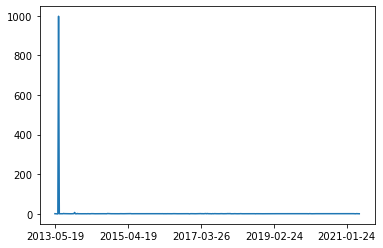

In [63]:
ew_ret_df.p1.plot()

In [64]:
ew_ret_df.p1.index[5]

'2013-06-23'

<AxesSubplot:>

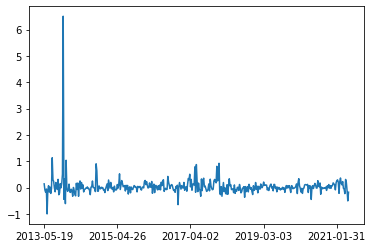

In [75]:
ew_ret_df.p1.drop(ew_ret_df.p1.index[5], axis=0).plot()

<AxesSubplot:>

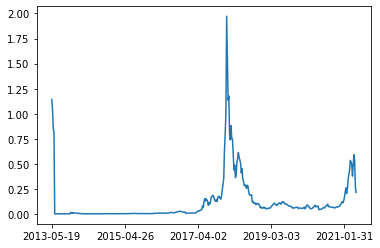

In [67]:
(ew_ret_df.p1.drop(ew_ret_df.p1.index[5], axis=0) + 1).cumprod().plot()

In [33]:
ew_ret_df.describe()

,p1,p2,p3,p4,p5
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.427470,2.833522,2.470507,3.088571,31.148478
std,48.820661,50.893639,44.817515,51.823645,145.067914
min,-0.999084,-0.998954,-0.999409,-0.999022,-0.999176
25%,-0.072758,-0.059519,-0.060380,-0.070786,-0.028800
50%,0.003729,0.012984,0.007767,0.017961,0.063672
75%,0.104953,0.088511,0.075804,0.078334,0.297196
max,998.150530,1035.549027,911.062153,1035.785696,1103.841856


<AxesSubplot:>

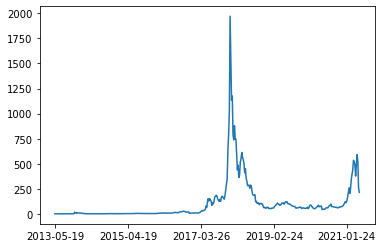

In [30]:
(ew_ret_df.p1 + 1).cumprod().plot()

<AxesSubplot:>

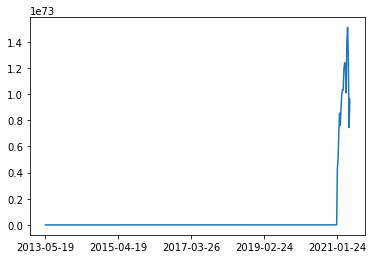

In [31]:
(ew_ret_df.p5 + 1).cumprod().plot()

In [27]:
vw_ret_df

,p1,p2,p3,p4,p5
2013-05-19,0.094260,0.084842,-0.016522,0.001334,-0.094297
2013-05-26,-0.083715,-0.161033,-0.242601,-0.206764,-0.284978
2013-06-02,-0.182279,-0.120163,-0.214486,-0.084596,-0.161369
2013-06-09,-0.005012,-0.106530,-0.215186,-0.179115,0.012786
2013-06-16,-0.999032,-0.998706,-0.999398,-0.998849,-0.999181
...,...,...,...,...,...
2021-05-02,0.295849,0.122514,0.033242,0.057417,0.044673
2021-05-09,-0.078923,-0.057608,-0.184512,-0.063644,-0.128013
2021-05-16,-0.437906,-0.489723,-0.508302,-0.181834,-0.262292
2021-05-23,-0.902860,-0.938272,-0.605814,-0.600435,0.281541
